In [1]:
#paquetes 
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline
import os
#from random import shuffle
import math
import pandas as pd
from scipy import optimize


PARA CADA RED: Me quedo con la componente gigante y me saco de encima el resto. Primero, voy a calcular, para todos los nodos de todas las redes, los siguientes parámetros: 

-degree centrality https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.centrality.html 

-eigenvector centrality https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality 

-subgraph centrality https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.communicability_centrality.html#networkx.algorithms.centrality.communicability_centrality 

-shortest-path centrality https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality 

-current flow betweeness centrality https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.current_flow_betweenness_centrality.html#networkx.algorithms.centrality.current_flow_betweenness_centrality 

Ordeno mis nodos de mayor a menor para cada parametro. Voy sacando de a un nodo y me fijo de que tamaño queda el hub más grande. Eje x es fracción de nodos sacados, y eje y es la fracción de nodos en el hub más grande. y=nodos en el componene gigante/tamaño de componente gigante original

Después, para la tabla 3, veo el efecto de sacar todos (nro=E) mis nodos esenciales. Además, veo el efecto de sacar E nodos no esenciales (osea la misma cantidad que esenciales haya en la red) de manera random, pero respetando el grado. Por ejemplo, si tengo 10 esenciales de grado 8 y 16 esenciales de grado 7, tengo que sacar 10 noesenciales de grado 8 y 16 noesenciales de grado 7 etc... Eso se hace muchass veces de manera random y se calcula el valor medio y dispersion..

Comentario: En realidad, lo formalmente bien seria ir redefiniendo todos mis parametros en cada iteración, pero como tardaria mil años, entonces lo hago "cada tanto". Saco ponele los 10 mas grandes y recalculo parametros en mi nueva componente gigante, etc etc Despues puedo comparar si realmente cambia o no, y cuánto.

# RED AP-MS

# Me quedo con la componente gigante

In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

def grafo(datosRed):
    G = nx.Graph()
    for i in range(np.shape(datosRed)[0]):
        G.add_edges_from([(datosRed[i][0],datosRed[i][1])])
    return G 

In [3]:
APMS = ldata('yeast_AP-MS.txt')
GAPMS = grafo(APMS)

In [4]:
Gc = max(nx.connected_component_subgraphs(GAPMS), key=len)

# Calculo coeficientes de centralidad

In [157]:
degrees=dict(Gc.degree())
#eigenvectors=nx.eigenvector_centrality(Gc)
#subgraph=sc = nx.communicability_betweenness_centrality(Gc)
#shortpath=nx.betweenness_centrality(Gc)
#currentflow=nx.current_flow_betweenness_centrality(Gc)


In [44]:
def ordenanodos(criterio): #G:grafo, criterio=diccionario 'nombredenodo':valor de parametro
    parametro=criterio.values()
    parametroordenado=sorted(set(parametro),reverse=True)
    nodosordenados=[]
    for j in parametroordenado:
        for key,value in criterio.items():
            if value==j:
                nodosordenados.append(key)
    return(nodosordenados)

In [67]:
def ordena_nodos(listadecriterios): #G:grafo, criterio=diccionario 'nombredenodo':valor de parametro
    parametro=[]
    for i in range(len(listadecriterios)):
        parametro = sum([parametro, list(listadecriterios[i].values())], [])
    parametroordenado=sorted(set(parametro),reverse=True)
    nodosordenados=[]
    for j in parametroordenado:
        for k in listadecriterios:            
            for key,value in k.items():
                if value==j:
                    nodosordenados.append(key)
    return(nodosordenados)

# Ordeno nodos según coeficientes de mayor a menor

In [158]:
DegreeImp=ordenanodos(degrees)
#EigenvectorImp=ordenanodos(eigenvectors)
#SubgraphImp=ordenanodos(subgraph)
#ShortpathImp=ordenanodos(shortpath)
#CurrentflowImp=ordenanodos(currentflow)

# Voy a empezar, sacando de a un nodo por DEGREE (por ahora sin recalcular los coeficientes)

In [159]:
GcDesarmable = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionNodes=np.linspace(1,650,650)/LengthOriginalGc
LargestGc=[]
for nodo in DegreeImp[0:650]:
    GcDesarmable.remove_node(nodo)
    LargestGc.append(float(len(max(nx.connected_component_subgraphs(GcDesarmable), key=len)))/LengthOriginalGc)


Text(0,0.5,'Largest Giant Component')

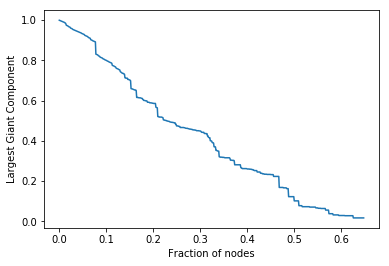

In [160]:
plt.plot(FractionNodes,LargestGc)
plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')

# Otra vez, pero ahora recalculando.. cambiará? 

In [161]:
GcDesarmable2 = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionNodes2=np.linspace(1,600,600)/LengthOriginalGc
LargestGc2=[]
for i in range(120):
    degrees2=dict(GcDesarmable2.degree())
    DegreeImp2=ordenanodos(degrees2)
    for j in range(5):
        GcDesarmable2.remove_node(DegreeImp2[j])
        LargestGc2.append(float(len(max(nx.connected_component_subgraphs(GcDesarmable2), key=len)))/LengthOriginalGc)


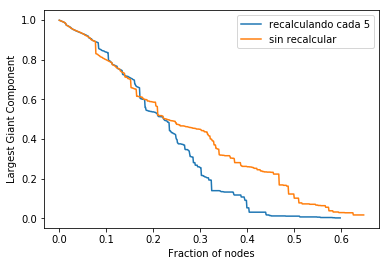

In [162]:
plt.plot(FractionNodes2,LargestGc2,label='recalculando cada 5') #en azul
plt.plot(FractionNodes,LargestGc,label='sin recalcular') #en naranja
plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')
plt.legend()

# Vamos ahora con EIGENVECTORS

In [72]:
eigenvectors=nx.eigenvector_centrality(Gc)
EigenvectorImp=ordenanodos(eigenvectors)

In [73]:
GcEigen = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionEigen=np.linspace(1,650,650)/LengthOriginalGc
LargestGcEigen=[]
for nodo in EigenvectorImp[0:650]:
    GcEigen.remove_node(nodo)
    LargestGcEigen.append(float(len(max(nx.connected_component_subgraphs(GcEigen), key=len)))/LengthOriginalGc)


Text(0,0.5,'Largest Giant Component')

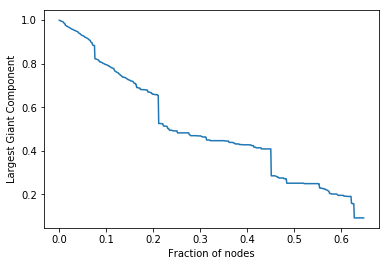

In [98]:
plt.plot(FractionEigen,LargestGcEigen)
plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')

In [107]:
#Me da error, como que no converge si i>=8 :(
n=4
m=50
GcEigen2 = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionEigen2=np.linspace(1,n*m,n*m)/LengthOriginalGc
LargestGcEigen2=[]
for i in range(n):
    eigenvectors2=[]
    subgrafos=list(nx.connected_component_subgraphs(GcEigen2))
    for l in range(len(subgrafos)):
        eigenvectors2.append(nx.eigenvector_centrality(subgrafos[l],max_iter=500))
    EigenvectorImp2 = ordena_nodos(eigenvectors2)
    for j in range(m):
        GcEigen2.remove_node(EigenvectorImp2[j])
        LargestGcEigen2.append(float(len(max(nx.connected_component_subgraphs(GcEigen2), key=len)))/LengthOriginalGc)


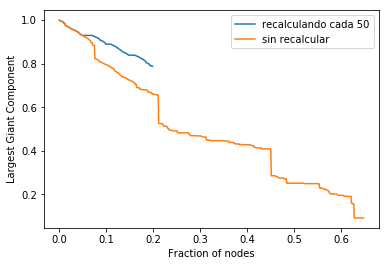

In [108]:
plt.plot(FractionEigen2,LargestGcEigen2,label='recalculando cada 50') #en azul
plt.plot(FractionEigen,LargestGcEigen,label='sin recalcular') #en naranja
plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')
plt.legend()

Me da error, como que no converge si empiezo a subir n y m

# Vamos ahora con SHORTEST PATH

In [116]:
shortpath=nx.betweenness_centrality(Gc)
ShortpathImp=ordenanodos(shortpath)

GcShort = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionShort=np.linspace(1,650,650)/LengthOriginalGc
LargestGcShort=[]
for nodo in ShortpathImp[0:650]:
    GcShort.remove_node(nodo)
    LargestGcShort.append(float(len(max(nx.connected_component_subgraphs(GcShort), key=len)))/LengthOriginalGc)


In [138]:
n=120  #600/m
m=5  #CADA CUANTO RECALCULO
GcShort2 = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionShort2=np.linspace(1,n*m,n*m)/LengthOriginalGc
LargestGcShort2=[]
for i in range(n):
    shortpath2=nx.betweenness_centrality(GcShort2)
    ShortImp2=ordenanodos(shortpath2)
    for j in range(m):
        GcShort2.remove_node(ShortImp2[j])
        LargestGcShort2.append(float(len(max(nx.connected_component_subgraphs(GcShort2), key=len)))/LengthOriginalGc)


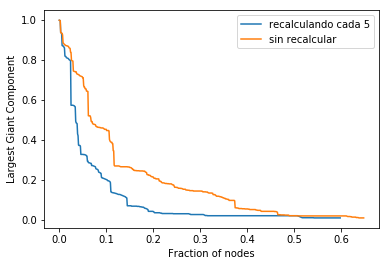

In [132]:
plt.plot(FractionShort2,LargestGcShort2,label='recalculando cada 5') #en azul
plt.plot(FractionShort,LargestGcShort,label='sin recalcular') #en naranja
plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')
plt.legend()

# Vamos ahora con CURRENT FLOW

In [129]:
currentflow=nx.current_flow_betweenness_centrality(Gc)
CurrentflowImp=ordenanodos(currentflow)

GcCurrent = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionCurrent=np.linspace(1,650,650)/LengthOriginalGc
LargestGcCurrent=[]
for nodo in CurrentflowImp[0:650]:
    GcCurrent.remove_node(nodo)
    LargestGcCurrent.append(float(len(max(nx.connected_component_subgraphs(GcCurrent), key=len)))/LengthOriginalGc)


In [143]:
n=70  #600/m
m=5  #CADA CUANTO RECALCULO
GcCurrent2 = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionCurrent2=np.linspace(1,n*m,n*m)/LengthOriginalGc
LargestGcCurrent2=[]
for i in range(n):
    currentflow2=nx.current_flow_betweenness_centrality(max(nx.connected_component_subgraphs(GcCurrent2),key=len))
    CurrentflowImp2=ordenanodos(currentflow2)
    for j in range(m):
        GcCurrent2.remove_node(CurrentflowImp2[j])
        LargestGcCurrent2.append(float(len(max(nx.connected_component_subgraphs(GcCurrent2), key=len)))/LengthOriginalGc)


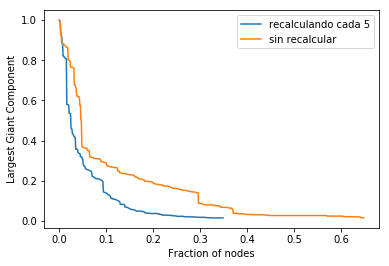

In [144]:
plt.plot(FractionCurrent2,LargestGcCurrent2,label='recalculando cada 5') #en azul
plt.plot(FractionCurrent,LargestGcCurrent,label='sin recalcular') #en naranja
plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')
plt.legend()

# por ultimo, SUBGRAPH

In [153]:
subgraph=nx.communicability_centrality(Gc)
SubgraphImp=ordenanodos(subgraph)

AttributeError: module 'networkx' has no attribute 'communicability_centrality'

In [ ]:
ME TIRA QUE NO EXISTE LA FUNCION, MISTERIO.

# Me guardo todo en .txt

In [179]:
DegreeAPMS=np.zeros((len(FractionNodes2),2))
DegreeAPMS[:,0]=FractionNodes2
DegreeAPMS[:,1]=LargestGc2

EigenAPMS=np.zeros((len(FractionEigen),2))
EigenAPMS[:,0]=FractionEigen
EigenAPMS[:,1]=LargestGcEigen

ShortpathAPMS=np.zeros((len(FractionShort2),2))
ShortpathAPMS[:,0]=FractionShort2
ShortpathAPMS[:,1]=LargestGcShort2

CurrentflowAPMS=np.zeros((len(FractionCurrent2),2))
CurrentflowAPMS[:,0]=FractionCurrent2
CurrentflowAPMS[:,1]=LargestGcCurrent2


In [178]:
np.savetxt('DegreeAPMS.txt', DegreeAPMS, delimiter=',')
np.savetxt('DegreeAPMS.txt', DegreeAPMS, delimiter=',')
np.savetxt('DegreeAPMS.txt', DegreeAPMS, delimiter=',')
np.savetxt('DegreeAPMS.txt', DegreeAPMS, delimiter=',') 

In [154]:
help(np.savetxt,)

Help on function savetxt in module numpy.lib.npyio:

savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
    Save an array to a text file.
    
    Parameters
    ----------
    fname : filename or file handle
        If the filename ends in ``.gz``, the file is automatically saved in
        compressed gzip format.  `loadtxt` understands gzipped files
        transparently.
    X : 1D or 2D array_like
        Data to be saved to a text file.
    fmt : str or sequence of strs, optional
        A single format (%10.5f), a sequence of formats, or a
        multi-format string, e.g. 'Iteration %d -- %10.5f', in which
        case `delimiter` is ignored. For complex `X`, the legal options
        for `fmt` are:
            a) a single specifier, `fmt='%.4e'`, resulting in numbers formatted
               like `' (%s+%sj)' % (fmt, fmt)`
            b) a full string specifying every real and imaginary part, e.g.
               `' %.